<img src="pds_banner.png" style="height:200px">


# Laboratorio 2 Procesamiento de señales 2019-2

# Muestreo y Cuantificación

## Universidad de Antioquia

---
## Introducción

En este laboratorio se pretende afianzar los conceptos relacionados con muestreo y cuantificación de señales. 
Para ello se usarán señales de audio que se van a re-muestrear y re-cuantizar. Al final se creará un sintetizador de audio con ciertas características de cuantización.


En el [Procesamiento digital de señales](https://es.wikipedia.org/wiki/Procesamiento_digital_de_se%C3%B1ales) solo se pueden realizar operaciones aritméticas con números en un rango limitado.

La [cuantificación](https://es.wikipedia.org/wiki/Cuantificaci%C3%B3n_digital) es el proceso de mapear valores de amplitud continua en un conjunto de valores contables. Puede ser aplicado a señales análogas o a señales en tiempo discreto.

![Interrelations between analog, discrete and digital signals](https://raw.githubusercontent.com/spatialaudio/digital-signal-processing-lecture/master/quantization/analog_discrete_digital.png)



---
## Procedimiento: parte 1

### Importar dependencias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
%matplotlib inline
from IPython.display import Audio




### Frecuencia de muestreo


1. Cargue, grafique, y escuche la señal de audio que acompaña esta guia. ¿Qué dice el mensaje?
2. Responda las siguientes preguntas:
    
    <span style="color:red">¿Cuál es su número de muestras?</span>
    
    <span style="color:red">¿Cuál es su frecuencia de muestreo (Fs)?</span>
    
    <span style="color:red">¿Cuál es su longitud en tiempo (s)?</span>
    
    <span style="color:red">¿En cuantos bits está cuantizada?</span>
    


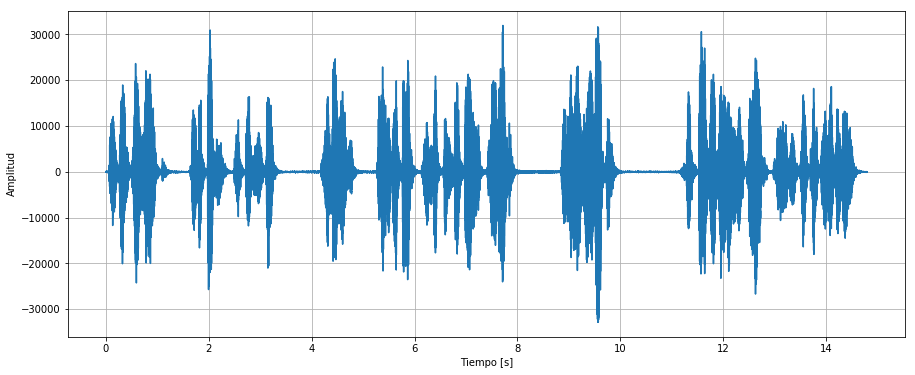

In [6]:
fs, x=read("080EHC_S1_readtext.wav") # carga señal de audio

t=np.arange(len(x))/fs
plt.figure(figsize=(15,6))
plt.plot(t,x)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Audio(x,rate=fs)

In [7]:
print("El número de muestras es: ", len(x))
print("La frecuencia de muestreo es: ", fs)
print("La longitud en tiempo es: ", len(x)/fs, "segundos")

range_s=np.max(np.abs(x))

print("rango de la señal: ", range_s)

bits=np.ceil(np.log2(range_s))+1

print("Número de bits de cuantificación: ", int(bits))

El número de muestras es:  236739
La frecuencia de muestreo es:  16000
La longitud en tiempo es:  14.7961875 segundos
rango de la señal:  32584
Número de bits de cuantización:  16


Escuche el audio con el doble de la frecuencia de muestreo de la señal original. <span style="color:red">¿Qué diferencia nota?</span>

In [8]:
Audio(x,rate=fs*2)

Realice el mismo procedimiento, pero esta vez con una frecuencia la mitad y a un cuarto de la original. <span style="color:red">¿Ahora qué pasa con el audio?</span>

In [9]:
Audio(x,rate=fs/2)

In [10]:
Audio(x,rate=fs/4)

Sub-muestree la señal a un cuarto de la frecuencia de muestreo original y escuche la nueva señal sub-muestreada a la frecuencia de muestreo apropiada.

In [12]:
from scipy.signal import resample

x2=resample(x, int(len(x)/4))
fs2=fs/4

Audio(x2,rate=fs2)

/home/camilo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/camilo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/camilo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interprete

In [13]:
Audio(x,rate=fs)

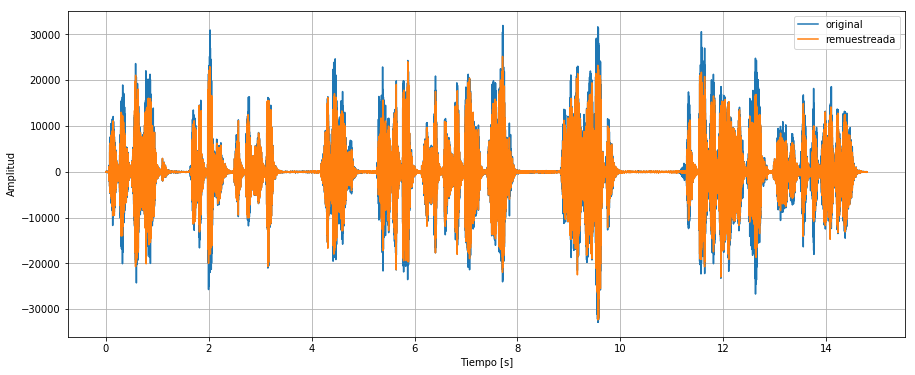

In [14]:
plt.figure(figsize=(15,6))
t=np.arange(len(x))/fs
plt.plot(t,x, label="original")
t2=np.arange(len(x2))/fs2
plt.plot(t2,x2, label="remuestreada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

/home/camilo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'alpha'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/camilo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'labels'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


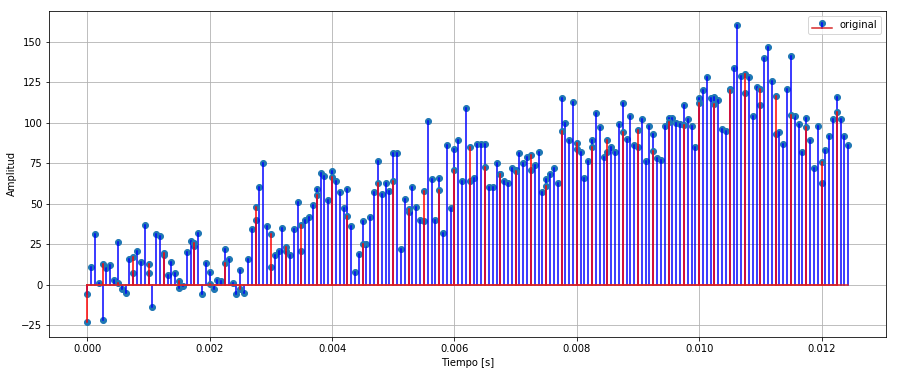

In [19]:
plt.figure(figsize=(15,6))
t=np.arange(len(x))/fs
plt.stem(t[0:200],x[0:200], 'b', label="original", alpha=0.7)
t2=np.arange(len(x2))/fs2
plt.stem(t2[0:50],x2[0:50], 'r', labels="remuestreada", alpha=0.7)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

### Aliasing

Genere dos señales sinusoidales con frecuencias $f_1=1$ Hz y $f_2=11$ Hz, respectivamente, y muestreadas a $f_s=10$ Hz. Grafíquelas en una misma figura. 

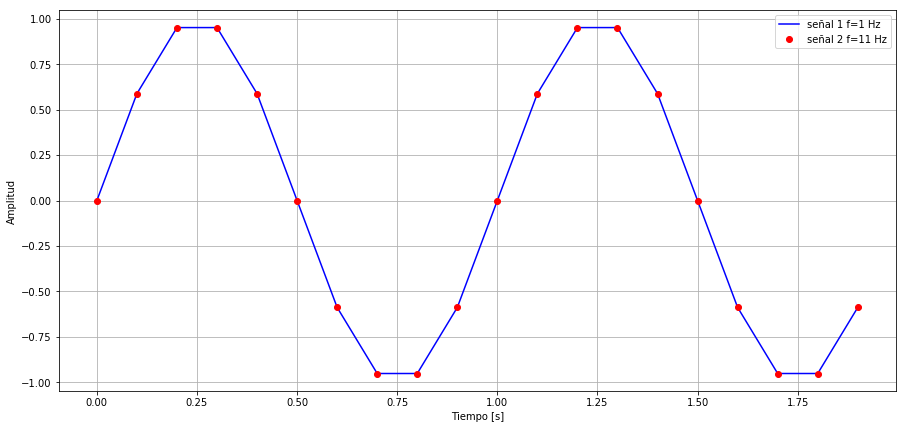

In [20]:
f1=1
f2=11
fs=10
t=np.arange(0,2,1/fs)

senal1=np.sin(2*np.pi*f1*t)
senal2=np.sin(2*np.pi*f2*t)

plt.figure(figsize=(15,7))
plt.plot(t,senal1, 'b', label="señal 1 f=1 Hz")
plt.plot(t,senal2, 'ro', label="señal 2 f=11 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()



<span style="color:red">¿Por qué se observan así las señales?</span>

 <span style="color:red"> ¿Cual es la frecuencia de Nyquist  para estas señales?</span>

Cambie la frecuencia de muestreo a la frecuencia de Nyquist y a dos veces la frecuencia de Nyquist.  <span style="color:red">¿Qué observa?</span>

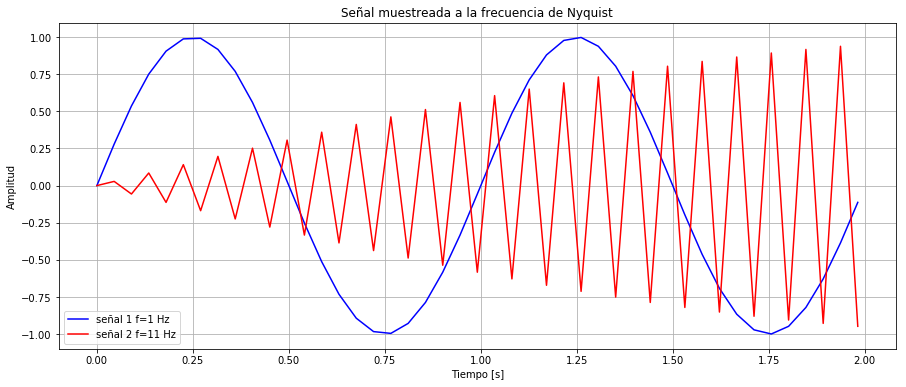

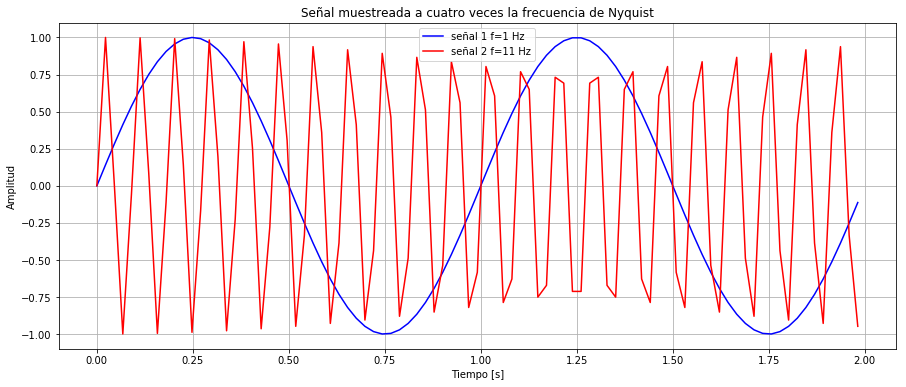

In [26]:
f1=1
f2=11
fs=22.2
t=np.arange(0,2,1/fs)

senal1=np.sin(2*np.pi*f1*t)
senal2=np.sin(2*np.pi*f2*t)

plt.figure(figsize=(15,6))
plt.plot(t,senal1, 'b', label="señal 1 f=1 Hz")
plt.plot(t,senal2, 'r', label="señal 2 f=11 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal muestreada a la frecuencia de Nyquist")
plt.legend()
plt.grid()
plt.show()

fs=44.4
t=np.arange(0,2,1/fs)

senal1=np.sin(2*np.pi*f1*t)
senal2=np.sin(2*np.pi*f2*t)

plt.figure(figsize=(15,6))
plt.plot(t,senal1, 'b', label="señal 1 f=1 Hz")
plt.plot(t,senal2, 'r', label="señal 2 f=11 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal muestreada a cuatro veces la frecuencia de Nyquist")
plt.legend()
plt.grid()
plt.show()


### Gráfica interactiva


<span style="color:red">Con base en la siguiente gráfica, determine el comportamiento de las señales 1 y 2 cuando se utilizan diferentes frecuencias de muestreo. Concluya al respecto.</span>

In [28]:
from ipywidgets import interact

def fs_int(fs):
    t=np.arange(0,2,1/fs)
    senal1=np.sin(2*np.pi*f1*t)
    senal2=np.sin(2*np.pi*f2*t)
    plt.figure(figsize=(15,6))
    plt.plot(t,senal1, 'b', label="señal 1 f=1 Hz")
    plt.plot(t,senal2, 'r', label="señal 2 f=11 Hz")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.title("Señales muestreadas")
    plt.legend()
    plt.grid()
    plt.show()

interact(fs_int, fs=np.arange(1,100))

<function __main__.fs_int(fs)>

### Cuantificación

Utilice la siguiente función para re-cuantizar señales

Nota: La señal de entrada debe estar en un rango entre -1 y 1 (recuerde normalizarla a ese valor)

In [29]:
def fxquant(s,bit):
    # s: senal de entrada
    # bit: bits de cuantificación
    Plus1=np.power(2, (bit-1))
    X=s*Plus1
    X=np.round(X)
    X=np.minimum(Plus1-1.0,X)
    X=np.maximum(-1.0*Plus1,X)
    X=X/Plus1
    return X

<span style="color:red">Re-cuantice la señal de audio utilizada en los numerales anteriores a 2, 4 y 8 bits. Escuche las señales. ¿Qué percibe?</span>

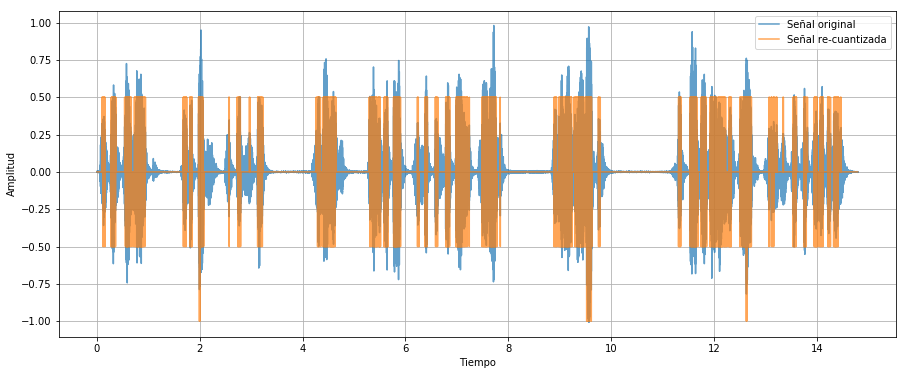

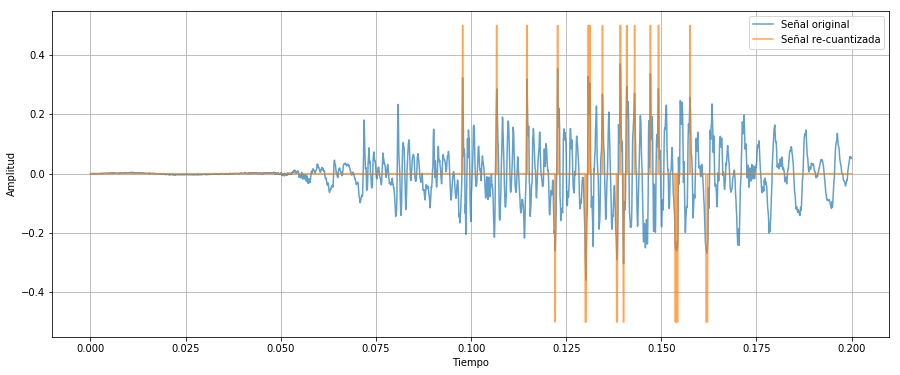

In [39]:
fs, x=read("080EHC_S1_readtext.wav") # carga señal de audio

x=x/np.max(np.abs(x))


x_req=fxquant(x, 2)

plt.figure(figsize=(15,6))
t=np.arange(len(x))/fs
plt.plot(t,x, label="Señal original",alpha=0.7)
plt.plot(t,x_req, label="Señal re-cuantizada",alpha=0.7)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.figure(figsize=(15,6))
t=np.arange(len(x))/fs
plt.plot(t[0:3200],x[0:3200], label="Señal original",alpha=0.7)
plt.plot(t[0:3200],x_req[0:3200], label="Señal re-cuantizada",alpha=0.7)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()


In [55]:
Audio(x_req, rate=fs)

<span style="color:red">Grafique las señales cuantizadas usando subplots</span>

### Error de cuantificación

Para medir el error de cuantificación se va a utilizar el error cuadrático medio (RMS), el cual se calcula con la sigueinte ecuación: 

$$\mathrm{Error}=\sqrt{\frac{1}{N}\sum_{k=0}^N \left| x\_\mathrm{orig}[k]-x\_\mathrm{cuantizada}[k] \right|^2}$$
    
La cual puede ser implementada de la siguiente forma
    
```error=np.sqrt(np.sum(np.abs(senal-senal_quanti)**2)/len(senal))```

<span style="color:red">Calcule y grafique el error de cuantificación para las siguientes tasas de bits: 2, 4, 6, ...,30.</span>

### Conceptos sobre el error de cuantificación

Energia del error

$$\sigma_e^2 = \Delta^2/12\,\,\,\Delta=(B-A)/2^R$$

Máxima relación señal a ruido


$$\mathrm{SNR}=2^{2R}$$

$$\mathrm{SNR_{db}}=10\log_{10}2^{2R}\approx 6R$$


### Regla de los 6dB

Un CD se cuantiza con 16 bits/muestra -> $\mathrm{SNR_{db}}\approx96dB$

Un DVD se cuantiza con 24 bits/muestra -> $\mathrm{SNR_{db}}\approx144dB$

## Musica a 1 bit de cuantificación

<span style="color:red">Antes de iniciar el procedimiento, responda si usted cree se puede generar y escuchar adecuadamente un audio con sólo 1 bit de cuantificación. Explique por qué cree que si, o por qué no.</span>

En el mundo análogo, la forma de onda más simple corresponde a una señal sinusoidal de frecuencia fija. Dichas señales describen un comportamiento oscilatorio de fenómenos físicos como cuerdas, ondas, y columnas de aire. Por otro lado, en el mundo digital, la forma de onda más simple que puede usarse es una señal cuadrada que alterna dos niveles de voltaje fijos. Dicha señal puede crearse fácilmente a través de un arreglo de compuertas lógicas formando un oscilador astable.

Las muestras de la señal cuadrada tienen solo dos niveles (+1 y -1), o alto y bajo, así que cada muestra puede ser codificada usando sólo un bit.

En los primeros dispositivos digitales (como consolas de videojuegos, y computadores personales) los periféricos de entrada/salida debían ser lo más simples posibles con el fin de minimizar los costos de hardware. Los procesadores sólo contaban con pocas lineas de datos (usualmente procesadores de 8 bits). Para la interfaz de audio, era común reservar sólo una linea, y conectarla directamente a los altavoces, por lo cual las únicas señales que podían salir eran señales cuadradas (con un sólo bit de cuantificación).


### Procedimiento

Considere el periodo fundamental de una señal cuadrada de frecuencia $\omega_0$ como.


$$ P = \frac{2\pi}{\omega_0} $$

La señal cuadrada puede generarse fácilmente usando la siguiente ecuación.

$$ x[n] = \begin{cases} +1 & \mbox{si $(n \mod P) \le (P/2)$} \\ -1 & \mbox{en otros casos} \end{cases} $$.

Para generar una señal cuadrada de frecuencia $\omega_0$ puede usar la siguiente función. ```N``` es el número de puntos de la señal a generar

In [42]:
def square_wave_cheap(w, N):
    p = np.round(2 * np.pi / w)
    return np.where((np.arange(0, N) % p) >= (p/2), -1, 1)

<span style="color:red">Genere una señal cuadrada con una frecuencia $\omega_0=0.13\pi$ con N=100 puntos, y comparela con una señal sinusoidal de las mismas características.</span>

<span style="color:red">Grafique ambas señales superpuestas. ¿Como se ven las graficas, y a que factor cree que se debe el efecto observado?</span>

<span style="color:red">Cambie la frecuencia a un valor apropiado (tal que $2\pi/\omega_0$ sea u número entero), y repita el procedimiento. </span>

## Procedimiento parte II
---
A continuación vamos a generar melodías con un bit de cuantificación, para ello se requiere una función que transforme una secuencia de notas en una señal cuadrada de determinada frecuencia. Para ello utilice la siguiente función.


In [43]:
def note2freq(note):
    # general purpose function to convert a note  in standard notation 
    #  to corresponding frequency
    if len(note) < 2 or len(note) > 3 or \
        note[0] < 'A' or note[0] > 'G':
        return 0
    if len(note) == 3:
        if note[1] == 'b':
            acc = -1
        elif note[1] == '#':
            acc = 1
        else:
            return 0
        octave = int(note[2])
    else:
        acc = 0
        octave = int(note[1])
    SEMITONES = {'A': 0, 'B': 2, 'C': -9, 'D': -7, 'E': -5, 'F': -4, 'G': -2}
    n = 12 * (octave - 4) + SEMITONES[note[0]] + acc
    f = 440 * (2 ** (float(n) / 12.0))
    #print note, f
    return f

De manera simple, la música se compone utilizando combinaciones de 12 sonidos para formar melodias. Una de las formas de representar la frecuencia fundamental de estos sonidos es mediante las primeras letras del alfabeto en este orden: C, D, E, F, G, A, B. Adicionalmente, se introducen otros dos símbolos: el sostenido (\#) y el bemol (b), para indicar que la nota se sube o baja un semitono respectivamente. Esto se puede observar en la  figura 

<img src="./keyboardnotes.png"
width="500"
align="middle" >


El siguiente ejemplo, crea una melodia a partir de una secuencia de notas, establecida. 'tune' es un tipo de arreglo que tiene la nota a reproducir, y la duración en segundos de la misma.


In [45]:
def play_notes(melody, time_scale=1, rate=32000):
    # melody is a tuple of pairs, each pair containing the pitch and the duration
    #  of each note; time_scale gives the base length of a note of unit duration 
    s = []
    for note in melody:
        f = 2 * np.pi * note2freq(note[0]) / float(rate)
        # 
        N = int(note[1] * rate * time_scale)
        if f > 0:
            s = np.concatenate((s, square_wave_cheap(f, N)))
        else:
            s = np.concatenate((s, np.ones(N)))
    return s


tune = (('B4', 2), ('B5', 2), ('F#5', 2), ('D#5', 2), ('B5', 1), ('F#5', 3), ('D#5', 4), 
        ('C5', 2), ('C6', 2), ('G5', 2),  ('E5', 2),  ('C6', 1), ('G5', 3),  ('E5', 4),
        ('B4', 2), ('B5', 2), ('F#5', 2), ('D#5', 2), ('B5', 1), ('F#5', 3), ('D#5', 4), 
        ('D#5', 1), ('E5', 1), ('F5', 2), ('F5', 1), ('F#5', 1), ('G5', 2), ('G5', 1), 
        ('G#5', 1), ('A5', 2), ('B5', 4))

fs = 24000
jingle = play_notes(tune, time_scale=0.06, rate=fs)
Audio(jingle, rate=fs)

<span style="color:red">Escuche el audio utilizando frecuencias de muestreo de 24000, 16000, y 8000 Hz. ¿Qué ocurre?</span>

<span style="color:red">Genere una melodia propia generando una nueva secuencia de notas. Cambie las notas y la duración de las mismas.</span>